<a href="https://colab.research.google.com/github/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification in TensorFlow
In this notebook we are going to look at building a binary classification model and optimising it as we go. I will discuss each change that is made to improve the model, starting from a very basic model to a working solution to the problem (iterating through all of the changes).
# Steps in modelling with TensorFlow
These are the steps that we have to go through in creating a model. We will work through these steps in this notebook for a Binary Classification problem.
1.   Prepare data (Import, inspect, visualise, split, shape)
2.   Build a model
3.   Compile the model
4.   Fit the model
5.   Evaluate the model
6.   Improve the model

---




# Preparing the data
We are going to generate some data for this exercise using sklearn make_circles function.

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Generating some data to view and fit.
from sklearn.datasets import make_circles

# Declare the number of circles
n_samples = 1000

# Create some samples
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [65]:
from sklearn.model_selection import train_test_split
# Create training and test data from original data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Visualising the data

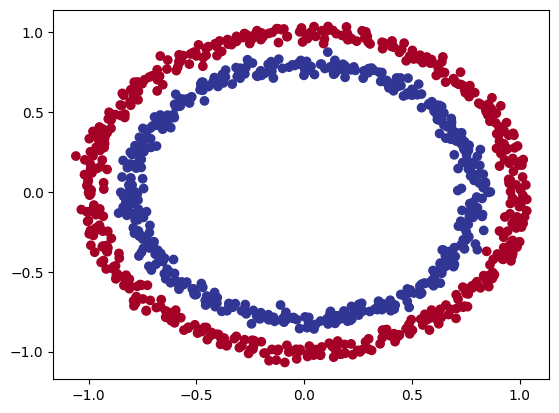

In [66]:
# Visualise with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# Build the model

This is step two in our sequence of creating a classification model.

In [72]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification requires one output neuron
])

# Compile the model
Using the model we just declared, let's compile the model now.

In [73]:
# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
This is where we fit the model that we've just compiled.

In [74]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=2500, verbose=0)

# Evaluate the model

In [75]:
# 4. Evaluate the model
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 1.0000


[0.01663917303085327, 1.0]

# Visualising the model

We're going to need to visualise our model so that we can see where our model is going wrong. We can do this by visualising the predictions that our model is making and having a look at the decision boundary.

These are the steps we need to take to do that:
* Take in a trained model of features (X) and labels (y).
* Create a meshgrid of the various "X" values.
* Make predictions accross the meshgrid.
* Plot the predictions and a line between the class zones.


In [76]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting "X".
  """
  # Define axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))
  X_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for multi-class labels
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


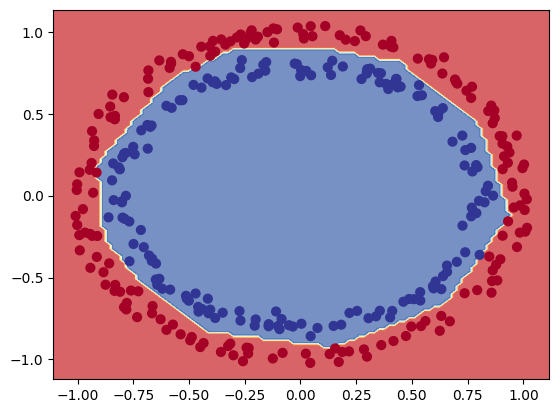

In [77]:
plot_decision_boundary(model, X_test, y_test)